# I. Etude de fonction génératrices de nombres aléatoires

In [4]:
import numpy
import random
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Sommaire: 

I. Etude de fonctions génératrices de nombres aléatoires
   1. Comparaison de fonctions génératrices de distribution exponentielle built-in python vs notebook
   2. Comparaison des générateurs de distribution gaussienne
   3. Méthode de Box-Muller
   
II. Mouvement brownien
1. Ajout d'un terme systématique au déplacement 
2. Ajout d'un terme de friction 
    
III. Magnétisation 
  1. Changement des conditions initiales 


# I. Etude de fonctions génératrices de nombres aléatoires

  ## 1. Comparaison de fonctions génératrices de distribution exponentielle built-in python vs notebook

Rappelons que la distribution exponentielle est donnée par 

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

où $\alpha$ est le facteur d'échelle.

Nous allons procéder à une comparaison de deux générateurs de distribution exponentielle; d'un côté une fonction interne (ou "built-in") à Python, numpy.random.exponential, et d'autre part une fonction construite "à la main". 

In [39]:
beta=0.25 #Paramètre de la distribution exp
n=100000 #Nombre de nombres tirés

In [40]:
z=numpy.random.exponential(1/beta,n) #built-in function

In [41]:
#fonction à la main
x = numpy.random.random_sample(100000)
y = -1/beta*numpy.log(1-x)

In [42]:
# Création des variables de plots
binwidth1=0.5
bins1=numpy.arange(0.,21., binwidth1)
xc1 = bins1[:-1] + binwidth1/2 # Compute centers of bins

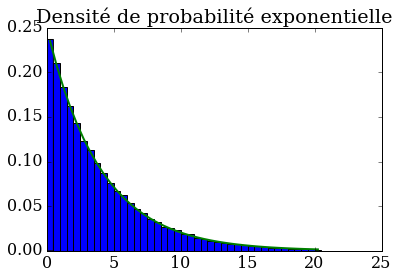

In [46]:
#plot de la fonction "main"
pyplot.hist(y,bins1,normed=True);
pyplot.plot(xc1,beta*numpy.exp(-beta*xc1), lw=2)
pyplot.title("Densité de probabilité exponentielle")

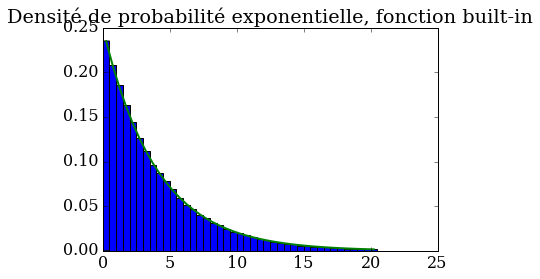

In [47]:
#plot de la fonction "python"
pyplot.hist(z,bins1,normed=True);
pyplot.plot(xc1,beta*numpy.exp(-beta*xc1), lw=2)
pyplot.title("Densité de probabilité exponentielle, fonction built-in")

On constate que les deux méthodes sont aussi valables l'une que l'autre étant données qu'elles donnent des résultats très similaires. 

## 2. Comparaison des générateurs de distribution gaussienne

Dans ce paragraphe, nous allons effectuer à nouveau une comparaison de deux générateurs mais cette fois-ci de distribution gaussienne; d'un côté une fonction interne (ou "built-in") à Python, numpy.random.randn, et de l'autre une fonction construite à partir de la méthode de rejet de Von Neumann. 

In [59]:
#fonction interne à python
f=numpy.zeros(n)
f=numpy.random.randn(n)

Effectuons à présent un rappel sur la méthode de rejet de Neumann:

L'idée derrière cette dernière est d'utiliser une densité de probabilité connue pour en générer une que l'on ne sait pas simuler directement.
En l'occurence, nous allons ici extraire, à partir d'un set de nombres aléatoires suivant une distribution exponentielle notée $p1(x)$, un nouveau set de nombres aléatoires suivant cette fois-ci une distribution gaussienne notée $p2(x)$. Pour que la méthode fonctionne, il doit exister une constant $K$ telle que: 

$$
{p_2(x)}\leq {Kp_1(x)},\quad \forall x.
$$

L'algorithme fonctionnera de la façon suivante: 

1. On générère un nombre $x$ suivant la distribution exponentielle. 
2. On crée un nombre aléatoire $U$ entre $0$ et $1$
3. On maintient $x$ dans notre set final de nombres aléatoires si $U\frac{p_1(x)}{Kp_2(x)}$

Pour le troisième point, imaginons que l'on génrère $N$ nombres aléatoires suivant la distribution $p_1$. Dans cet échantillon,le nombre de fois que l'on rencontre une valeur $x_1$ dans un intervalle $\Delta x$ centré autour de $x_1$ est donné environs par: 

$$
n(x_1)\approx N p_1(x_1)\Delta x
$$

De par le troisième point, ce nombre sera réduit dans le set final de nombres aléatoires à : 

$$
n_f(x_1) \approx n(x_1) \frac{p_2(x_1)}{Kp_1(x)} = N\frac{p_2(x_1) \Delta x}{K}
$$

Cela implique que dans ce set final, la proportion de nombres centrés autour de deux valeurs $x_1$ et $x_2$ est donnée par: 

$$
\frac{n_f(x_1)}{n_f(x_2)}=\frac{p_2(x_1)}{p_2(x_2)}.
$$

On en déduit que le set résultant de nombre aléatoires est bien distribué selon $p_2$. L'étape trois implique que l'on rejette systématiquement les nombres de la séquence initiale et la taille $N_f$ de la séquence finale est nécéssairement plus petite que l'initiale ($N_f\approx N/K$). Il nous faut donc choisir $p_1$ avec précaution, afin que $K$ soit aussi petite que possible.

In [60]:
#Fonction "faite main"
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(n):
    u1 = numpy.random.random_sample()
    
    # 1.Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # 2. Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # 3. Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), n/K)

Size of accepted set h and expected size 1/K: 71508 71428.57142857143


Nous pouvons à présent effectuer un plot de nos deux distributions:

In [61]:
# Variables de plots
binwidth2=0.1
bins2=numpy.arange(0.,5.1, binwidth2)
xc2 = bins2[:-1] + binwidth2/2 # Compute centers of bins

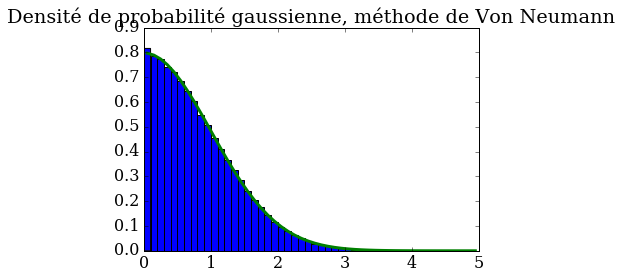

In [62]:
#plot de la fonction "faite main"
pyplot.hist(h,bins2,normed=True,color='blue');
pyplot.plot(xc2,2*numpy.exp(-xc2**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')
pyplot.title("Densité de probabilité gaussienne, méthode de Von Neumann")

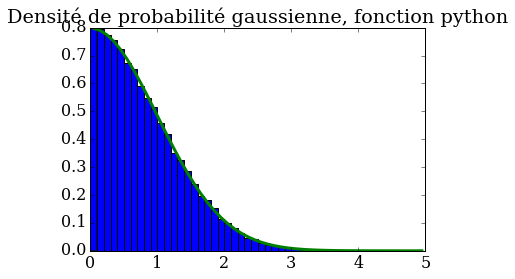

In [63]:
#plot de la fonction python
pyplot.hist(f,bins2,normed=True);
pyplot.plot(xc2,2*numpy.exp(-xc2**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')
pyplot.title("Densité de probabilité gaussienne, fonction python")

On constate que nos deux méthodes donnent des résultats quasi identiques. 

## 3. Méthode de Box-Muller

L'idée de la méthode de Box-Muller est de générer des paires de nombres aléatoires suivant une distribution normale centrée réduite, c'est à dire de moyenne nulle et d'écart typé égal à 1, à partir d'une source de nombres aléatoires suivant une loi uniforme. 

Nous avons choisi ici d'implémenter la méthode dans sa forme cartésienne mais notons que nous aurions également pu le faire dans sa forme polaire. La forme cartésienne transforme des coordonnées cartésiennes uniformémement distribuées sur le cercle unité en des coordonnées cartésiennes normalement distribuée/


Soient $x$ et $y$ choisis indépendamment et uniformément dans [−1,1], et $s = x^2 + y^2$. Si $s ≥ 1$ ou $s = 0$, rejetons-le et choisissons à nouveau un couple $(x, y)$, jusqu'à ce que $s$ appartienne à $]0,1[$. Pour ces points "filtrés", calculons ensuite:

$$z_0=x\sqrt{\frac{-2ln(s)}{s}}$$

$$z_1=y\sqrt{\frac{-2ln(s)}{s}}$$


(source: wikipedia) 


In [19]:
numbers=0
b=numpy.zeros(n) #tableau qui recevra les nombres produits

while numbers<n:
    x=2*numpy.random.random_sample(2)-1 #2 nombres tirés uniformément entre -1 et 1.
    s=(x[0])**2+(x[1])**2
    if (s!=0 and s<1):
        b[numbers]=x[0]*numpy.sqrt(-2/s*numpy.log(s))
        numbers+=1

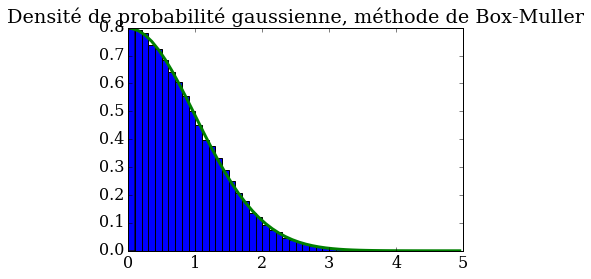

In [54]:
#plots
pyplot.hist(b,bins2,normed=True,color='blue');
pyplot.plot(xc2,2*numpy.exp(-xc2**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')
pyplot.title("Densité de probabilité gaussienne, méthode de Box-Muller")

On constate qu'il s'agit bien là comme attendu du graphique d'une distribution normale centrée réduite. 

# II. Mouvement brownien

Commençons par rappeler que le mouvement brownien modélise le déplacement d'une particule ponctuelle dans un fluide, qui n'est soumise à aucune autre force que celles engendrées par les collisions avec les particules du fluide. 

Imaginons une goutte de teinture se diffusant dans un liquide. Le mouvement d'une particule de la goutte de teinture  dans le liquide est régit par l'équation suivante: 

$$
dx=x(t+dt)−x(t)=ds
$$

où $ds$ est le déplacement résultant des collisions avec les molécules de liquide environnantes, qui constitue une contribution aléatoire et doit être modélisé de façon adaptée. 
Etudions le cas où $ds$ est modélisé par: 

$$
ds=\alpha \sqrt{dt}\cal{N(0,1)}
$$

où: $\alpha$ est le même coefficient de diffusion que l'on utiliserait dans l'équation de diffusion. A chaque étape temporelle,$\cal{N(0,1)}$ est un nombre aléatoire généré à partir d'une ditribution normale $f(n)$, centrée autour de $0$ et de variance égale à $1$. 

$$
f(n)=\frac{1}{\sqrt{2\pi}}e^{-\frac12 n^2}
$$

Pour une question de simplicité, nous supposerons ici que le mouvement brownien se passe en une dimension.

## 1. Ajouter un terme systématique au déplacement

Ajoutons une contribution systématique au déplacement:

$$
dx=cdt+\alpha \sqrt{dt}\cal{N(0,1)}
$$

où $c$ est une constante.

Notre but sera d'analyser le comportement du déplacement aléatoire dans ce cas.

Commençons par implémenter l'équation du déplacement modifiée et plottons ensuite le résultat. 

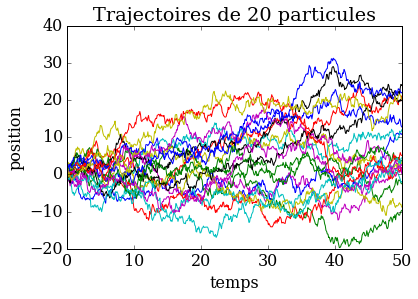

In [55]:
npart=100000 #nombre de trajectoires

x0 = numpy.random.normal(loc=0,scale=1,size=npart) #condition itiniale

T=50.0
nt=500
dt=T/nt
alpha=2.0

c=0.1 #vitesse du déplacememnt systématique

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)+c*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

pyplot.ylabel("position")
pyplot.xlabel("temps")
pyplot.title("Trajectoires de 20 particules")

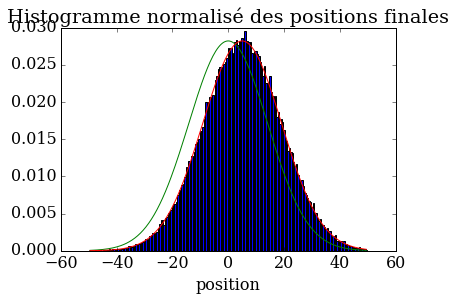

In [56]:
#histogramme des derniers emplacements des trajectoires
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2 # Compute bin centers

pyplot.hist(x[nt],bins,normed=True);

pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*alpha**2*T))\
                            / numpy.sqrt(2*numpy.pi*alpha**2*T)) #gaussienne centrée

pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*alpha**2*T))\
                            / numpy.sqrt(2*numpy.pi*alpha**2*T)) #gaussienne décentrée

pyplot.title("Histogramme normalisé des positions finales")
pyplot.xlabel("position")

In [ ]:
#position moyenne finale, ~ c*T1=0.1*50=5
sum(x[nt])/npart

Le centre de la gaussienne rouge s'est déplacé de $x_{centre}=ct$ par rapport à celui de la gaussienne verte, qui est celle sans déplacement systématique.

Pour trouver l'équation régissant $\rho$ dans ce cas, examinons d'abord le cas où $c=0$. L'équation est 
$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}
$$

Pour la résoudre, on décompose $\rho$ en mode de Fourier:

$$
\rho(x,t)=\int \tilde{\rho}(\omega,t)e^{i\omega x}d\omega
$$
et la contrainte sur les modes de Fourier est

$$
\frac{\partial \tilde{\rho}}{\partial t}=-\alpha \omega^2 \tilde{\rho}
$$

$$
\tilde{\rho}(\omega,t)=A(\omega)e^{-\alpha\omega^2 t}
$$

La fonction $A(\omega)$ se trouve pour $t=0$, pour lequel $\rho(x,0)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$. Puisque $A$ est la transformée de Fourier de cette gaussienne, $A(\omega)=e^{-\frac{\omega^2 \sigma^2}{2}}$.

Donc
$$
\rho(x,t)=\int e^{-\omega^2(\alpha t + \frac{\sigma^2}{2})} e^{i\omega x}d\omega
$$

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi(\sigma^2+\alpha t)}}e^{-\frac{x^2}{2(\sigma^2+2\alpha t)}}
$$

La solution de l'équation avec la contribution systématique au déplacement est
$$
\rho'(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-ct)^2}{2\sigma_t^2}}
$$

puisque le déplacement est systématique et se fait toujours vers les $x$ positifs.
Donc $\rho'(x,t)=\rho(x-ct,t)$, et

$$
\int \tilde{\rho'}(\omega,t)e^{i\omega x}d\omega=\int \tilde{\rho}(\omega,t)e^{i\omega(x-ct)}d\omega
$$

ce qui implique

$$
\tilde{\rho'}(\omega,t)=\tilde{\rho}(\omega,t)e^{-i\omega ct}
$$

$$
\tilde{\rho'}=e^{-\alpha \omega^2 t}e^{-i\omega ct}
$$

La contrainte sur les modes de Fourier est alors

$$
\frac{\partial \tilde{\rho'}}{\partial t}=(-\alpha \omega^2 - i\omega c) \tilde{\rho'}
$$

ce qui correspond à

$$
\frac{\partial \rho'}{\partial t}= - c\frac{\partial \rho'}{\partial x} + \alpha \frac{\partial^2 \rho'}{\partial x^2}
$$

C'est l'équation avec l'ajout d'un déplacement systématique.

## 2. Avec un terme de friction

A présent, nous allons considérer le problème avec un terme de friction ajouté au déplacement:

$$
dx=-\gamma x dt +\alpha \sqrt{dt}\cal{N(0,1)}
$$

où $\gamma$ est le coefficient de friction. 
Quelle est l'évolution de la distribution au cours du temps ? 

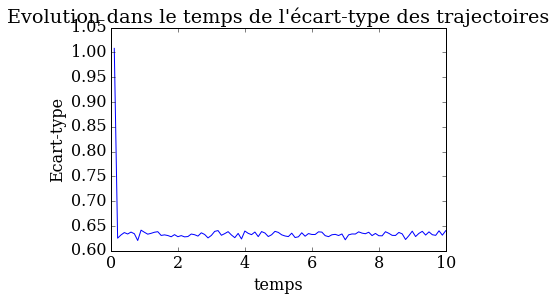

In [57]:
gamma=10 #coefficient de friction

npart1=10000

T1=10
nt1=100
dt1=T1/nt1

t1 = numpy.arange(0,T1+dt1,dt1)
x1 = numpy.empty([nt1+1,npart1])
ecart_typ1=numpy.zeros(nt1)

x0_1 = numpy.random.normal(loc=0,scale=1,size=npart1) #condition initiale
x1[0]=x0_1

for i in range(nt1):
    x1[i+1]=x1[i]+numpy.sqrt(2*alpha*dt1)*numpy.random.normal(0,1,npart1)-gamma*x1[i]*dt1
    ecart_typ1[i] = numpy.sqrt(sum(x1[i]**2)/npart1-(sum(x1[i])/npart1)**2)
    
pyplot.plot(t1[1:],ecart_typ1) #plot de l'évolution de l'écart-type=sigma dans le temps
pyplot.title("Evolution dans le temps de l'écart-type des trajectoires")
pyplot.ylabel("Ecart-type")
pyplot.xlabel("temps")

L'écart-type atteint bien une valeur stationnaire

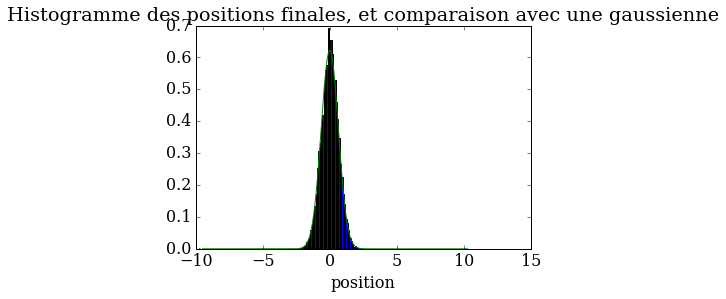

In [58]:
binwidth2=0.1
bins1=numpy.arange(-10,10,binwidth2)
bins1 = bins1 + binwidth1/2
bin_centers1 = bins1[:-1]+binwidth1/2

pyplot.hist(x1[nt1],bins1,normed=True); #histogramme des dernières positions

sigma_exp=ecart_typ1[-1] #"sigma expérimental"
pyplot.plot(bin_centers1, numpy.exp(-bin_centers1**2/(2.0*sigma_exp**2))\
                            / numpy.sqrt(2*numpy.pi*sigma_exp**2))
pyplot.title("Histogramme des positions finales, et comparaison avec une gaussienne")
pyplot.xlabel("position")

Les dernières positions sont distribuées selon une gaussienne. La densité de probabilité stationnnaire est donc une gaussienne.

In [ ]:
npart2=10000

dgamma=0.5
gammaf=10 #dernière valeur de gamma
gammas=numpy.arange(0.5,gammaf+dgamma,dgamma)

sigmas=numpy.zeros(len(gammas))

T2=10
nt2=100
dt2=T2/nt2

t2 = numpy.arange(0,T2+dt2,dt2)
x2 = numpy.empty([nt2+1,npart2])
ecart_typ2=numpy.zeros(nt2)

x0_2 = numpy.random.normal(loc=0,scale=1,size=npart2)
x2[0]=x0_2

for j in range(len(gammas)):
    gamma=gammas[j]
    for i in range(nt2):
        x2[i+1]=x2[i]+alpha*numpy.sqrt(dt2)*numpy.random.normal(0,1,npart2)-gamma*x2[i]*dt2
    sigmas[j] = numpy.sqrt(sum(x2[-1]**2)/npart2-(sum(x2[-1])/npart2)**2)

pyplot.plot(gammas,sigmas)
pyplot.title("Ecart-type des trajectoires en fonction de gamma")
pyplot.xlabel("gamma")
pyplot.ylabel("Ecart-type")

L'écart-type a l'air de toujours diminuer quand $\gamma$ augmente. Pour augmenter $\gamma$, il faut augmenter le nombre d'itérations, sinon la trajectoire ne converge pas.

Les moyennes font toujours $0$, même avec des conditions initiales gausiennes de moyenne différente $0$. C'est au centre qu'il y a le moins de mouvement (où $-\gamma x=0$), l'état stationnaire s'y forme.

# III. Magnétisation

Nous discuterons dans cette partie du modèle de Ising, qui se penche sur l'étude du ferromagnétisme et des transitions de phases. Rappelons que le ferromgagnétisme est une propriété de certains matériaux de maintenir une magnétisation non-nulle en l'absence de champ magnétique extérieur. Cette propriété disparaît à une certaine température: la température de Curie $T_c$, qui dépend du matériau considéré. 

# Modèle de Ising pour le ferromagnétisme

Le matériau est décrit en termes de dipôles distribuées sur une grille régulière, ils peuvent pointer vers le haut ou vers le bas. Les dipôles représentent les atomes constituant le matériau et agissant comme des aimants orientés dans différentes directions. 
Dans ce modèle, on considère que: 
   - les dipôles intéragissent avec leurs voisins les plus proches. 
   - La configuration où les dipôles sont alignés est plus stable que celle où ils sont dans dans des sens opposés. 

L'énergie du système peut s'écrire comme: 

$$
E=-J\sum_{pairs(i,j)} s_i s_j,
$$

où: 
$s_i$ est le spin du dipôle et vaut $1$ ou $-1$.
$J>0$ est une constante de couplage.

L'énergie est minimale lorsque tous les dipôles sont alignés et dans ce cas elle est égale à $-JN_{pairs}$

A chaque changement de sens d'un dipôle, l'énergie varie de 
$$
\Delta E = -{J} s_i \sum_{j \in n(i)} s_j
$$

La probabilité de trouver le système dans une configuration $X$ est donnée par: 

$$
p(X) = \frac{e^{-\beta E_X}}{Z}
$$

où: 

$\beta=1/k_B T$, $k_B$ étant la constante de Boltzman.
     
$E_X$ est l'énergie potentielle de la configuration $X$.
     
$Z$ est la constante de normalisation.
     
Par conséquent, on voit que si l'énergie augmente, la probabilité de trouver le système dans la configuration $X$ diminue. 




# Algorithme de Métropolis 

Il est évident que lorsque que le nombre de cases de la grille devient très grand, le calcul devient très lourd, voir impossible. Nous devons donc avoir recours à des processus stochastiques, dans le cas présent, l'algorithme de Metropolis donc la logique est la suivante:

   - On considère un état initial tel que chaque spin a une orientation aléatoire. 
   - La "unit step" de l'algorithme consiste à choisir un spin au hasard et à essayer de changer son orientation. 
   - Si $E_s'<E_s$ alors $s=s'$, c'est à dire qu'on choisi le spin inversé
   - Si $E_s'>E_s$ alors le changement de sens du spin n'est accepté que si: 

$$
p_{\rm flip}=e^{-\beta\Delta E},
$$

   - Dans le cas contraire, la configuration du système ne change pas. 
   - Le processus est répété jusqu'à ce qu'un nombre assez grand d'états $X-k$  aient été collectés. 
   - Ensuite, les quantités qui nous intéressent sont calculées, dans notre cas l'énergie et la magnétisation, 

$$
<E> = \frac{\sum_k E_k}{N_k}\\
$$
$$
<M> = \frac{\sum_k M_k}{N_k}
$$
   

In [30]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [31]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    
    
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    """ Flip the site with Metropolis probability
     Condition is always satisifed if dE < 0"""
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]
        

Nous pouvons à présent écrire une fonction qui crée une séquence d'états pour le modèle de Ising en utilisant la fonction implémentant l'algorithme de Métropolis ci-dessus. 

In [32]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.random_integers(0,nx-1)
            iy=numpy.random.random_integers(0,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Calculons à présent l'énergie moyenne du système:



In [33]:
def average_energy(NMC,states,nx,ny,alpha):
    energy=0
    for state in states:
        for i in range(nx):
            for j in range(ny):
                energy+=energy_at_site(state,alpha,state[i,j],i,j)
    return energy/(2*NMC) 

    """division par 2 energie=somme sur les paires 
    des énergies d'interaction, or chaque paire a ici été comptée deux fois"""

Ainsi que la magnétisation moyenne du système: 

In [34]:
nalpha=20 #nombre de valeurs d'alpha
alphas=numpy.linspace(0,1,nalpha)

NMC=100
nx=100
ny=100

averages_energies=numpy.zeros(nalpha)
averages_magnetizations=numpy.zeros(nalpha)

for a in range(nalpha):
    sp = numpy.ones([nx,ny])
    states=ising_model_metropolis(sp,NMC,nx,ny,alphas[a])
    averages_energies[a]=average_energy(NMC,states,nx,ny,alphas[a])
    averages_magnetizations[a]=sum(states.sum(axis=(1,2)))/NMC

Portons à présent en graphique les deux quantités que nous venons de calculer, à savoir l'énergie et la magnétisation moyennes, en fonction du paramètre alpha.

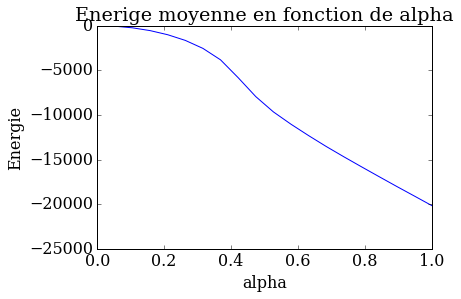

In [65]:
pyplot.plot(alphas,averages_energies)
pyplot.title("Enerige moyenne en fonction de alpha")
pyplot.ylabel("Energie")
pyplot.xlabel("alpha")
#energie moyenne en fonction de alpha

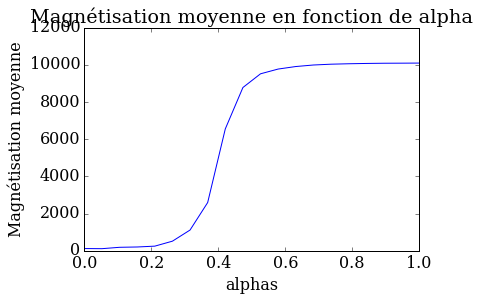

In [67]:
pyplot.plot(alphas,averages_magnetizations)
pyplot.title("Magnétisation moyenne en fonction de alpha")
pyplot.xlabel("alphas")
pyplot.ylabel("Magnétisation moyenne")
#magnétisation moyenne en fonction de alpha

La transition se fait autour de la valeur critique de $\alpha_c=0.4$.

# Conditions initiales différentes

Nous voulons à présent refaire l'analyse que nous venons d'effectuer, pour une grille avec des conditions aux bords ou une configuration initiale différente. Nous allons considérer l'exemple où le spin pointe vers le haut sur les bords de la grille, et a un sens aléatoire à l'intérieur de celle-ci. 

On commence par écrire une fonction générant un état initial pour notre grille en implémentant nos conditions initales ainsi que nos conditions aux bords. 

In [37]:
def initial_state(nx,ny):
    """ Crée un tableau de spins orientés aléatoirement à l'intérieur, et vers le haut sur les 4 bords
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.random_integers(0,1,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1
    
    r[0,:]=1
    r[-1,:]=1
    r[:,0]=1
    r[:,-1]=1
    
    return r

Générons à présent une séquence d'état à l'aide de l'algorithme de Métropolis pour une série de valeurs de alpha. 
Nous voulons calculer l'énergie et la magnétisation moyennes du système pour pouvoir les porter en graphique et étudier leur évolution. 

In [68]:
nalpha1=10 #nombre de valeurs d'alpha
alphas1=numpy.linspace(0,1,nalpha1)

NMC=200

averages_energies1=numpy.zeros(nalpha1)
averages_magnetizations1=numpy.zeros(nalpha1)
sp=initial_state(nx,ny)

for a in range(nalpha1):
    states=ising_model_metropolis(sp,NMC,nx,ny,alphas1[a])
    averages_energies1[a]=average_energy(NMC,states,nx,ny,alphas1[a])
    averages_magnetizations1[a]=sum(states.sum(axis=(1,2)))/NMC

0
1
2
3
4
5
6
7
8
9


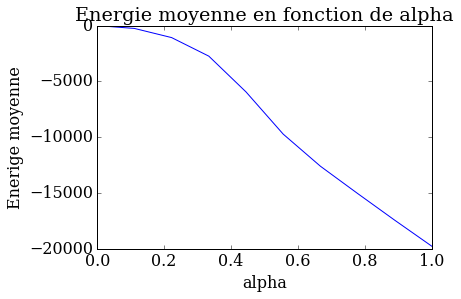

In [70]:
pyplot.plot(alphas1,averages_energies1)
pyplot.title("Energie moyenne en fonction de alpha")
pyplot.ylabel("Enerige moyenne")
pyplot.xlabel("alpha")
#energie moyenne en fonction de alpha

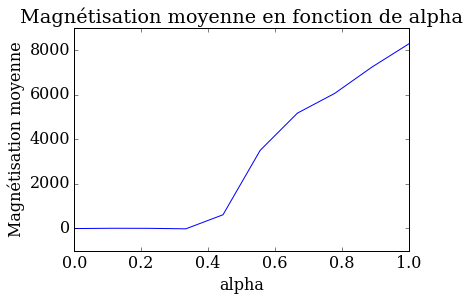

In [71]:
pyplot.plot(alphas1,averages_magnetizations1)
pyplot.title("Magnétisation moyenne en fonction de alpha")
pyplot.ylabel("Magnétisation moyenne")
pyplot.xlabel("alpha")
#magnétisation moyenne en fonction de alpha

Pour $\alpha<\alpha_c$ (donc $T>T_c$), le matériau reste à une magnétisation moyenne nulle, du à l'agitation thermique. Lorsque $T<T_c$, le matériau a tendance à se magnétiser, car l'agitation thermique est trop faible donc tous les spins ont tendance à s'orienter de la même manière.